## Analysis Section

### Observed Trends:
1/ This first trend to look at which sets a good baseline for common sense is Latitude vs Max Temp. One would assume that cities closer to the equator, 0 latitude, are generally hotter than cities on the farther spectrums of latitude. As we expect, the data holds true. We see that the coldest areas are at latitudes of -60 and 60-80, places where the sun doesn't hit as directly. 

2/ The second thing to note which I find interesting is the outlier point on the Latitude vs Humidity graph. This city is San Jerónimo in Peru. Strangely enough, the first few times I ran api pulls from openweathermap I also got humidity outliers for other cities in Peru. I am curious to see what pulling weather data from just Peru would show. If all their data is showing humidity at above 300 then the data that is being collected in that area is most likely off and needs to get fixed by someone.

3/ Lastly, it seems as if there are 5 main cloudiness percentages that people tend to describe their city with. Based on the chart, there are high trends of 0%, 20%, 40%, 75%, and 100% cloudiness. When looking at the scatter plot there is quite a bit of white space between these points which makes me wonder how cloudiness is recorded. Due to the amount of white space between points it appears that cloudiness is put into different classes. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# Save config information


589

In [ ]:
#print(cities)

In [4]:
cityName = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
maxtemp = []
windspeed = []

test = "London"
url = "http://api.openweathermap.org/data/2.5/weather?"
i = 1 
for city in cities:
        query_url = url + "appid=" + api_key + "&q=" + city + "&units=imperial"
        response = requests.get(query_url)
        weatherjson = response.json()

        try:
            print(f' Processing Record {i} | {city}')
            cityName.append(weatherjson["name"])
            cloudiness.append(weatherjson["clouds"]["all"])
            country.append(weatherjson["sys"]["country"])
            date.append(weatherjson["dt"])
            humidity.append(weatherjson["main"]["humidity"])
            lat.append(weatherjson["coord"]["lat"])
            lng.append(weatherjson["coord"]["lon"])
            maxtemp.append(weatherjson["main"]["temp_max"])
            windspeed.append(weatherjson["wind"]["speed"])
            #print(f' Lat for City {weatherjson["coord"]["lat"]}')
        except (KeyError, IndexError):
            print("Missing field/result...skipping")
        #print(f')
        i = i + 1 
        
        
        # Test environment below - tread carefully 
        
        #city_record = response["name"]
        #print(json)
        #print(city)
        #country_code = city.country_code
        #name = city.city_name
        #print(f"The city of {name.title()} is in '{country_code.upper()}'.")
        #print()
        #print(city.windspeed)
    # try and except not working    
    #except:
        #print("Skipped")
    #continue
        
            # Day 18 - 04 Activity
        #try:
        #print(f"Closest {restr_type} restaurant is {results[0]['name']}.")
        #
        #types_df.loc[index, 'name'] = results[0]['name']
        #types_df.loc[index, 'address'] = results[0]['vicinity']
        #types_df.loc[index, 'price_level'] = results[0]['price_level']
        #types_df.loc[index, 'rating'] = results[0]['rating']
        #
        #except (KeyError, IndexError):
        #print("Missing field/result... skipping.")
        #
        #print("------------")
    
#lat

 Processing Record 1 | codrington
 Processing Record 2 | tuktoyaktuk
 Processing Record 3 | chokurdakh
 Processing Record 4 | kozan
 Processing Record 5 | hobart
 Processing Record 6 | nhulunbuy
 Processing Record 7 | seddon
 Processing Record 8 | narsaq
 Processing Record 9 | salaga
 Processing Record 10 | bathsheba
 Processing Record 11 | jamestown
 Processing Record 12 | hilo
 Processing Record 13 | bluff
 Processing Record 14 | port alfred
 Processing Record 15 | kautokeino
 Processing Record 16 | englehart
 Processing Record 17 | arraial do cabo
 Processing Record 18 | souillac
 Processing Record 19 | gat
 Processing Record 20 | rikitea
 Processing Record 21 | new norfolk
 Processing Record 22 | salalah
 Processing Record 23 | port-gentil
 Processing Record 24 | jambi
 Processing Record 25 | atuona
 Processing Record 26 | cherskiy
 Processing Record 27 | ponta do sol
 Processing Record 28 | riyadh
 Processing Record 29 | port hardy
 Processing Record 30 | clyde river
 Processing R

 Processing Record 220 | bilibino
 Processing Record 221 | mogadishu
 Processing Record 222 | the valley
 Processing Record 223 | roma
 Processing Record 224 | attawapiskat
Missing field/result...skipping
 Processing Record 225 | pundaguitan
 Processing Record 226 | namatanai
 Processing Record 227 | doha
 Processing Record 228 | esperance
 Processing Record 229 | kutum
 Processing Record 230 | esil
 Processing Record 231 | quatre cocos
 Processing Record 232 | korla
Missing field/result...skipping
 Processing Record 233 | yatou
 Processing Record 234 | suclayin
 Processing Record 235 | artyom
 Processing Record 236 | cabedelo
 Processing Record 237 | bargal
Missing field/result...skipping
 Processing Record 238 | carnarvon
 Processing Record 239 | bandarbeyla
 Processing Record 240 | tongzi
 Processing Record 241 | te anau
 Processing Record 242 | port lincoln
 Processing Record 243 | nome
 Processing Record 244 | matamoros
 Processing Record 245 | kachug
 Processing Record 246 | long

 Processing Record 437 | azimur
Missing field/result...skipping
 Processing Record 438 | college
 Processing Record 439 | balakhta
 Processing Record 440 | nichinan
 Processing Record 441 | beirut
 Processing Record 442 | gbarnga
 Processing Record 443 | antigonish
 Processing Record 444 | yumen
 Processing Record 445 | porto novo
 Processing Record 446 | serebryansk
 Processing Record 447 | high level
 Processing Record 448 | mujiayingzi
 Processing Record 449 | katobu
 Processing Record 450 | coruripe
 Processing Record 451 | champasak
 Processing Record 452 | mareeba
 Processing Record 453 | mogapi
 Processing Record 454 | plast
 Processing Record 455 | manicore
 Processing Record 456 | sioux lookout
 Processing Record 457 | kuldur
 Processing Record 458 | monticello
 Processing Record 459 | nishihara
 Processing Record 460 | xinzhi
 Processing Record 461 | shubarshi
 Processing Record 462 | bubaque
 Processing Record 463 | kaitangata
 Processing Record 464 | omboue
 Processing Reco

In [ ]:
url2 = "http://api.openweathermap.org/data/2.5/weather?"
city2 = "London"
# Build query URL
#query_url2 = url2 + "appid=" + api_key + "&q=" + city2 
query_url2 = url2 + "appid=" + api_key + "&q=" + city2 + "&units=imperial"
 
response = requests.get(query_url2)
json2 = response.json()
json2["coord"]["lon"]

In [ ]:
json2

In [5]:
# Printing stuff to double check everything matches up.

#len(lat)
#len(cityName)
print(f'{len(lat)},{len(cityName)}, {len(cloudiness)}, {len(country)}, {len(date)}, {len(lng)}, {len(maxtemp)}')

523,523, 523, 523, 523, 523, 523


In [6]:
# DF built
df = pd.DataFrame({"City":cityName,
                  "Cloudiness": cloudiness,
                   "Country": country,
                   "Date": date,
                   "Humidity": humidity,
                   "Lat": lat,
                   "Lng": lng,
                   "Max Temp": maxtemp,
                   "Wind Speed": windspeed
                  })
df.head(20)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Codrington,75,AU,1565886703,93,-28.95,153.24,59.00,8.05
1,Tuktoyaktuk,90,CA,1565886704,93,69.44,-133.03,41.00,25.28
2,Chokurdakh,53,RU,1565886704,73,70.62,147.90,40.84,11.77
3,Kozan,75,TR,1565886705,70,37.45,35.82,84.20,10.29
4,Hobart,75,AU,1565886705,81,-42.88,147.33,52.00,5.82
5,Nhulunbuy,1,AU,1565886705,94,-12.18,136.78,71.60,4.70
6,Seddon,75,AU,1565886706,54,-37.81,144.89,60.01,17.22
7,Narsaq,20,GL,1565886706,38,60.91,-46.05,59.00,9.17
8,Salaga,48,GH,1565886707,84,8.55,-0.52,79.18,4.14
9,Bathsheba,40,BB,1565886707,66,13.22,-59.52,89.60,24.16


In [7]:
export_to_csv = df.to_csv('citydata.csv')
export_to_csv

In [ ]:
#df["Max Temp"].sort_values(ascending = True)
#df["Humidity"].sort_values(ascending = False)

In [8]:
xLat = df["Lat"]
yMaxTemp = df["Max Temp"]
yHumidity = df["Humidity"]
yCloudiness = df["Cloudiness"]
yWindSpeed = df["Wind Speed"]


## Temp vs. Latitude

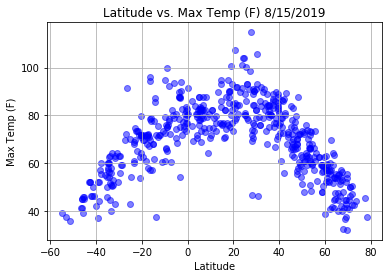

In [23]:
plt.scatter(xLat, yMaxTemp, c = 'blue', alpha = .5)
axes = plt.axes()
axes.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Latitude vs. Max Temp (F) 8/15/2019')
plt.savefig('latVStemp.png')

## Humidity vs. Latitude 

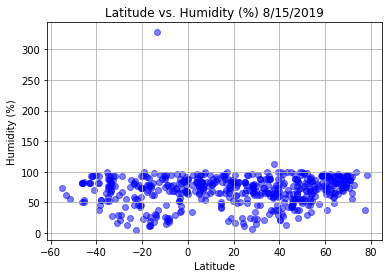

In [24]:
plt.scatter(xLat, yHumidity, c = 'blue', alpha = .5)
axes = plt.axes()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Humidity (%) 8/15/2019')
axes.grid()
plt.savefig('latVShum.png')

## Cloudiness vs. Latitude

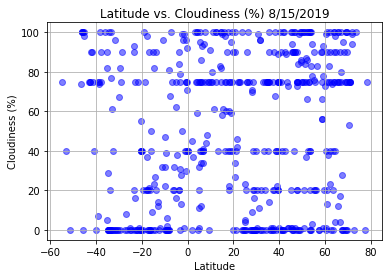

In [25]:
plt.scatter(xLat, yCloudiness, c = 'blue', alpha = .5)
axes = plt.axes()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs. Cloudiness (%) 8/15/2019')
axes.grid()
plt.savefig('latVScloud.png')

## Wind Speed vs. Latitude

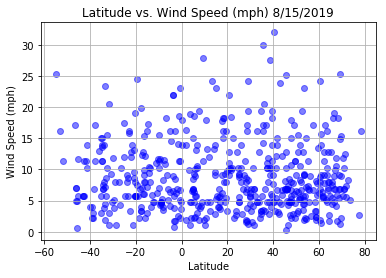

In [26]:
plt.scatter(xLat, yWindSpeed, c = 'blue', alpha = .5)
axes = plt.axes()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude vs. Wind Speed (mph) 8/15/2019')
axes.grid()
plt.savefig('latVSwind.png')